In [5]:
import pandas as pd

execution_df = pd.DataFrame({
    'FlexGen': [0.5, 0.5, 0.5, 0.5],
    'DejaVu': [0.4, 0.4, 0.4, 0.4],
    'llama.cpp': [2.4, 1.7, 1.1, 0.6]
}, index=[1, 4, 8, 16])

# breakdown_df = pd.DataFrame({})

breakdown_df = execution_df.stack().reset_index().rename(columns={'level_0': 'batch_size', 'level_1': 'sys', 0: 'gpu_time'})
breakdown_df['total'] = 100

breakdown_df

batch_size        sys  gpu_time  total
0            1    FlexGen       0.5    100
1            1     DejaVu       0.4    100
2            1  llama.cpp       2.4    100
3            4    FlexGen       0.5    100
4            4     DejaVu       0.4    100
5            4  llama.cpp       1.7    100
6            8    FlexGen       0.5    100
7            8     DejaVu       0.4    100
8            8  llama.cpp       1.1    100
9           16    FlexGen       0.5    100
10          16     DejaVu       0.4    100
11          16  llama.cpp       0.6    100

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

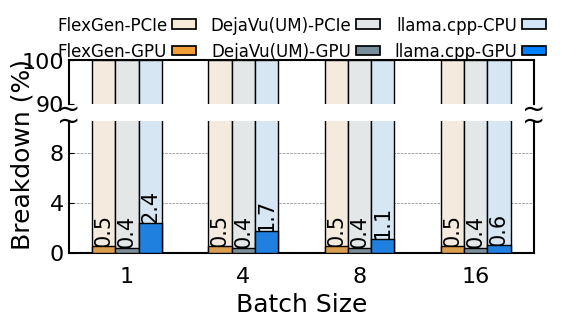

In [6]:
from matplotlib.colors import hex2color
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib


# rcParams['font.family'] = 'sans-serif'
# rcParams['font.sans-serif'] = ['Helvetica']
rcParams['axes.linewidth'] = 1.5
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42



r = 3
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, height_ratios=[1, r], figsize=(6, 2.5))
pl = {
    'FlexGen': hex2color("#f19e38"),
    'DejaVu': hex2color("#788f9b"),
    'llama.cpp': hex2color("#0080ff")
}
pl_dimmed = {
    'FlexGen': (247, 236, 219),
    'DejaVu': (227, 231, 233),
    'llama.cpp': (210, 230, 248)
}
pl_dimmed = {k: tuple([x / 255 for x in v]) for k, v in pl_dimmed.items()}

ax.set_xlim(-10, 40)

sns.barplot(data=breakdown_df, x='batch_size', y='total', hue='sys', ax=ax, legend=None, palette=pl_dimmed, linewidth=1, edgecolor="k", width=0.6, zorder=3)

sns.barplot(data=breakdown_df, x='batch_size', y='total', hue='sys', ax=ax2, dodge=True, legend=None, palette=pl_dimmed, linewidth=1, edgecolor="k", width=0.6, zorder=3)
main_ax = sns.barplot(data=breakdown_df, x='batch_size', y='gpu_time', hue='sys', ax=ax2, dodge=True, legend=None, palette=pl, linewidth=1, edgecolor="k", width=0.6, zorder=4)
for container in main_ax.containers:
    main_ax.bar_label(container, fontsize=15, rotation=90)

ax.set_ylim(90, 100)
ax2.set_ylim(0, 10.5)

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='x', labelsize=20, which='both', bottom=False, top=False, labelbottom=False)
ax.tick_params(axis='y', which='both', labelsize=16, direction="in")
ax.set_ylabel('')
ax.grid(axis="y", linestyle="--", linewidth=0.5, color="gray", zorder=0)

ax2.spines['top'].set_visible(False)
ax2.tick_params(axis='x', labelsize=16, which='major', length=0, direction="in", pad=10)
ax2.tick_params(axis='y', which='both', labelsize=16, direction="in")
ax2.grid(axis="y", linestyle="--", linewidth=0.5, color="gray", zorder=0)
ax2.yaxis.set_major_locator(plticker.MultipleLocator(base=4))
ax2.set_xlabel('')

kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# top plot y breaks
ax.text(-0.025, -0.445, '~', ha='left', va='bottom', size=20, horizontalalignment='center', fontfamily="Dejavu Sans", **kwargs)
ax.text(1.025, -0.445, '~', ha='right', va='bottom', size=20, horizontalalignment='center', fontfamily="Dejavu Sans", **kwargs)
# bottom plot y breaks
kwargs.update(transform=ax2.transAxes) 
ax2.text(-0.025, 0.895, '~', ha='left', va='bottom', size=20, horizontalalignment='center', fontfamily="Dejavu Sans",**kwargs)
ax2.text(1.025, 0.895, '~', ha='right', va='bottom', size=20, horizontalalignment='center', fontfamily="Dejavu Sans", **kwargs)

legend = ax.legend(
    handles=[
        plt.Rectangle((0, 0),0.5,0.5,facecolor=pl_dimmed['FlexGen'],edgecolor="black",linewidth=1.25),
        plt.Rectangle((0, 0),0.5,1,facecolor=pl['FlexGen'],edgecolor="black",linewidth=1.25),

        plt.Rectangle((0, 0),0.5,1,facecolor=pl_dimmed['DejaVu'],edgecolor="black",linewidth=1.25),
        plt.Rectangle((0, 0),0.5,1,facecolor=pl['DejaVu'],edgecolor="black",linewidth=1.25),

        plt.Rectangle((0, 0),0.5,1,facecolor=pl_dimmed['llama.cpp'],edgecolor="black",linewidth=1.25),
        plt.Rectangle((0, 0),0.5,1,facecolor=pl['llama.cpp'],edgecolor="black",linewidth=1.25)
    ],
    labels=["FlexGen-PCIe", "FlexGen-GPU", "DejaVu(UM)-PCIe", "DejaVu(UM)-GPU", "llama.cpp-CPU", "llama.cpp-GPU"],
    loc="upper center", 
    bbox_to_anchor=((0.5, 2.35)),
    ncol=3,
    columnspacing=0.9,
    handlelength=1.4,
    handleheight=0.5,
    handletextpad=0.3,
    frameon=False,
    fontsize=12,
    markerfirst=False
)

ax2.set_ylabel('Breakdown (%)', fontsize=18)
ax2.set_xlabel('Batch Size', fontsize=18)
ax2.yaxis.set_label_coords(-0.075, 0.75)
plt.savefig('../figures/motivation-breakdown.eps', bbox_inches='tight')
